In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris


In [2]:
iris=load_iris()

In [15]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [16]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [20]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [21]:
df['target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [22]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [25]:
df['flower_name']=df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [26]:
import matplotlib.pyplot as plt

In [28]:
%matplotlib inline

In [30]:
df0=df[df.target==0]
df1=df[df.target==1]
df2=df[df.target==2]

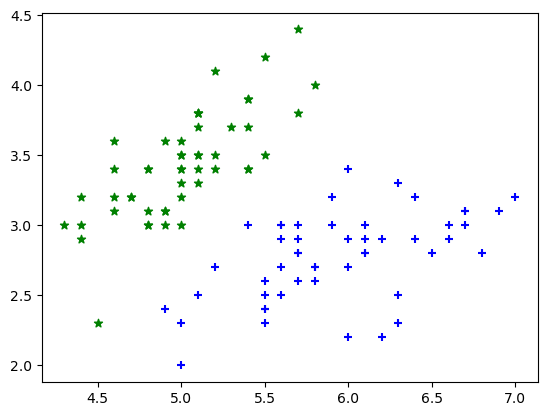

In [31]:
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='green',marker='*')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='blue',marker='+')

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x=df.drop(['target','flower_name'],axis='columns')
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [48]:
y=df.target
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [50]:
from sklearn.svm import SVC

In [51]:
model=SVC()

In [52]:
model.fit(x_train,y_train)

SVC()

In [53]:
model.score(x_test,y_test)

0.9666666666666667

In [56]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

In [57]:
y_pred=model.predict(x_test)

In [59]:
cm=confusion_matrix(y_test,y_pred)

Text(33.22222222222222, 0.5, 'Truth')

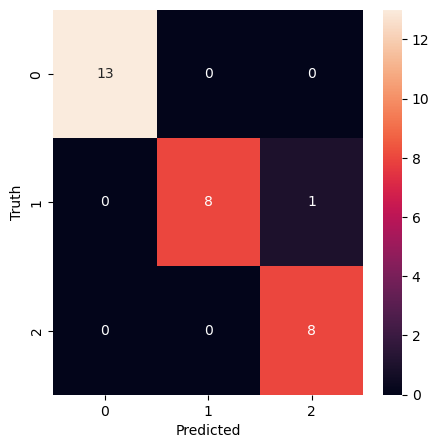

In [63]:
plt.figure(figsize=(5,5))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')